

## Linear Regression and Logistic Regression



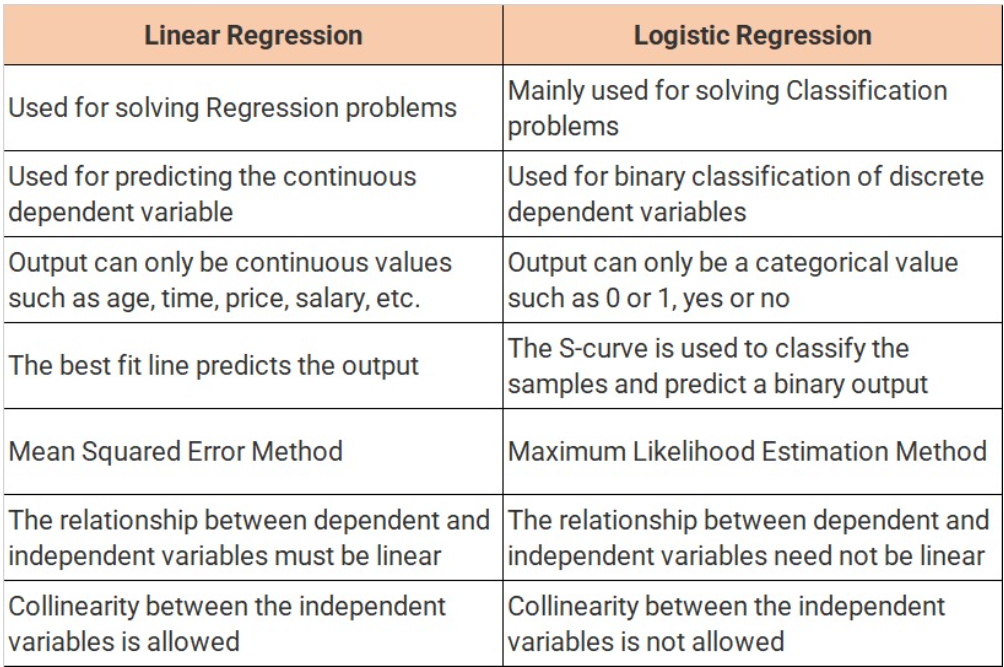

# Understanding the wine data columns
1. fixed acidity
most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2. volatile acidity
the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3. citric acid
found in small quantities, citric acid can add ‘freshness’ and flavor to wines

4. residual sugar
the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5. chlorides
the amount of salt in the wine

6. free sulfur dioxide
the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisul-fite ion; it prevents microbial growth and the oxidation of wine

7. total sulfur dioxide
amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8. density
the density of water is close to that of water depending on the percent alcohol and sugar con-tent

9. pH
describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3–4 on the pH scale

10. sulphates
a wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant

11. alcohol
the percent alcohol content of the wine

12. quality
output variable (based on sensory data, score between 0 and 10)

# Logistic Regression 

# Wine Quality Prediction

In [83]:
# Import Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Read Data

df_wine =  pd.read_csv('winequalityN.csv')

In [85]:
# shape of data

df_wine.shape

(6497, 13)

In [86]:
# information of columns

df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [87]:
df_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [88]:
# summary stat

df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


the count of each feature differs which describes presence of missing values

there is a larger gap between the 75th percentile and max for features like residual sugar,free sulfur dioxide & total sulfur dioxide

on an average the quality of wine is found to be 5.81 and the average alcohol content in wine is 10.49

the volatile acidity and citric acid of wine has similar range(0.00, 1.6)

almost negligible variation is found in density

In [89]:
# checking for missing values

df_wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

we observe the presence of missing values in the data

since the missing value are few,

we can drop them and this wouldn't affect the further process.

In [90]:
df_wine.dropna().shape

(6463, 13)

In [91]:
df = df_wine.dropna()
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

# Analysis of quality of wine

C:\Users\ANJITH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


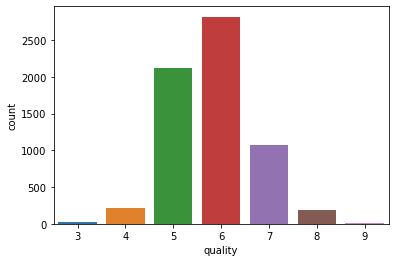

In [92]:
sns.countplot(df['quality'])
plt.show()

In [93]:
df_wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

the count of Quality of wine is max at 6 and count is 2836
the quality of wine most preffered has quality "6"

# Comparision of quality of alcohol and alcohol content

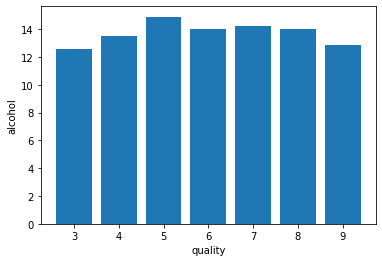

In [94]:
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

the quality of alcohol increases with increase in alcohol content.

<Figure size 432x288 with 0 Axes>

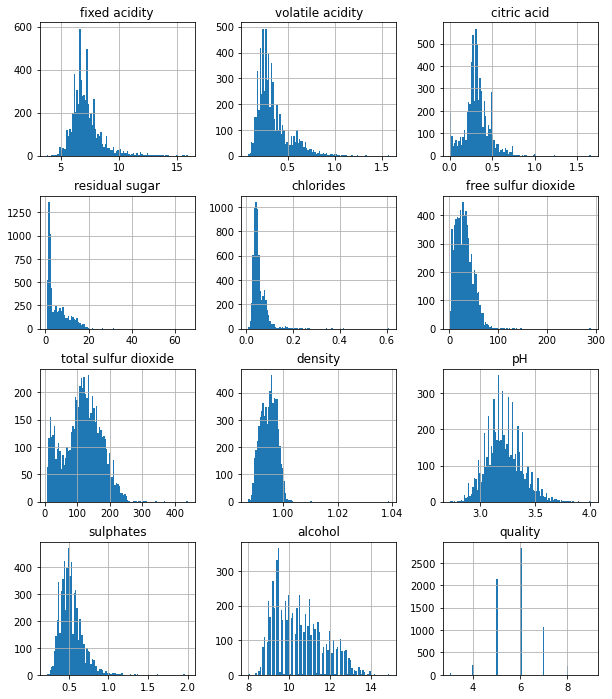

In [95]:
plt.tight_layout()
df_wine.hist(bins = 100, figsize = (10,12))
plt.show()

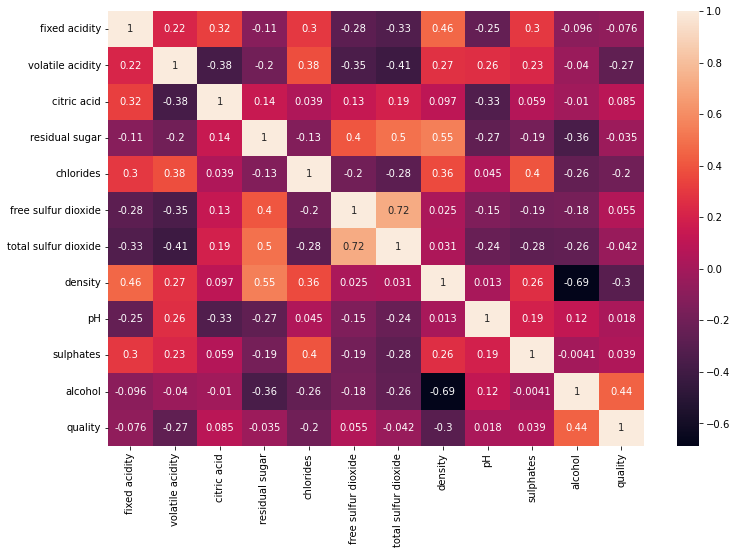

In [96]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

total sulphur dioxide has higher correlation we can retain or discard the column

In [97]:
df_wine = df.drop('total sulfur dioxide',axis=1)

In [98]:
df_wine.isnull().sum()

type                   0
fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [99]:
df_wine = pd.get_dummies(df_wine,drop_first=True)

In [100]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


# Min-Max Normalization

We plan to Normalize by scaling our data because the features range high, so this technique could help to balance the ranges of data between 0 and 1.

In [101]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(df_wine)
df_scaled = norm_fit.transform(df_wine)
#new_xtest = norm_fit.transform(x_test)
# display values
print(df_scaled)
 

[[0.26446281 0.12666667 0.21686747 ... 0.11594203 0.5        1.        ]
 [0.20661157 0.14666667 0.20481928 ... 0.2173913  0.5        1.        ]
 [0.3553719  0.13333333 0.24096386 ... 0.30434783 0.5        1.        ]
 ...
 [0.20661157 0.28666667 0.07831325 ... 0.43478261 0.5        0.        ]
 [0.17355372 0.37666667 0.07228916 ... 0.31884058 0.33333333 0.        ]
 [0.18181818 0.15333333 0.28313253 ... 0.43478261 0.5        0.        ]]


In [102]:
from sklearn.preprocessing import MinMaxScaler

nrm = MinMaxScaler()

# fit the scale
norm_fit = nrm.fit(df_wine)

# transformation of training data
scaled_df = norm_fit.transform(df_wine)
print(scaled_df)

[[0.26446281 0.12666667 0.21686747 ... 0.11594203 0.5        1.        ]
 [0.20661157 0.14666667 0.20481928 ... 0.2173913  0.5        1.        ]
 [0.3553719  0.13333333 0.24096386 ... 0.30434783 0.5        1.        ]
 ...
 [0.20661157 0.28666667 0.07831325 ... 0.43478261 0.5        0.        ]
 [0.17355372 0.37666667 0.07228916 ... 0.31884058 0.33333333 0.        ]
 [0.18181818 0.15333333 0.28313253 ... 0.43478261 0.5        0.        ]]


In [103]:
df_new = pd.DataFrame(scaled_df,columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','density','pH','sulphates','alcohol','quality','best quality'])

In [104]:
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.267785,0.217054,0.129213,0.115942,0.5,1.0
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.132832,0.449612,0.151685,0.217391,0.5,1.0
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.154039,0.418605,0.123596,0.304348,0.5,1.0
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.163678,0.364341,0.101124,0.275362,0.5,1.0
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.163678,0.364341,0.101124,0.275362,0.5,1.0


# Splitting data into train test split

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x = df_new.drop(['quality','best quality'],axis=1)
y = df_new['best quality']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

# Model Building

# Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [108]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [109]:
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:,1]

In [110]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 454,   38],
       [  16, 1431]], dtype=int64)

In [111]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       492
         1.0       0.97      0.99      0.98      1447

    accuracy                           0.97      1939
   macro avg       0.97      0.96      0.96      1939
weighted avg       0.97      0.97      0.97      1939



In [112]:
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, precision_score, recall_score, accuracy_score

In [113]:
roc  =  roc_auc_score(y_test, y_pred)
acc  =  accuracy_score(y_test, y_pred)
prec =  precision_score(y_test, y_pred)
rec  =  recall_score(y_test, y_pred)
f1   =  f1_score(y_test, y_pred)

roc_rf  =  roc_auc_score(y_test, y_pred_rf)
acc_rf  =  accuracy_score(y_test, y_pred_rf)
prec_rf =  precision_score(y_test, y_pred_rf)
rec_rf  =  recall_score(y_test, y_pred_rf)
f1_rf   =  f1_score(y_test, y_pred_rf)

model= pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, roc]],
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model
                                                               

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.972151,0.974132,0.988943,0.981481,0.955853


1 represents the quality greater than 0.7 which is considered in good quality wine

0 represents the quality below 0.7 which is not a good quality wine.

The model predicts the quality of white wine with an accuracy of 98%.

# Simple Linear Regression

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [148]:
dataset = pd.read_csv('train.csv')


In [160]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [159]:
dataset.dropna(axis=0,how="any",inplace=True)

In [162]:
X = dataset.drop("y",axis=1)
y = dataset["y"]

In [163]:
y_train

250    100.532892
616     44.268005
415     78.870977
109     57.872192
375     91.850911
          ...    
359     10.285748
192     55.345299
629     17.034020
559     13.897486
684     62.166753
Name: y, Length: 466, dtype: float64

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [168]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [170]:
y_pred = regressor.predict(X_test)
X_train

,x
250,99.0
264,13.0
453,8.0
109,56.0
375,92.0
...,...
360,98.0
192,52.0
630,56.0
560,25.0


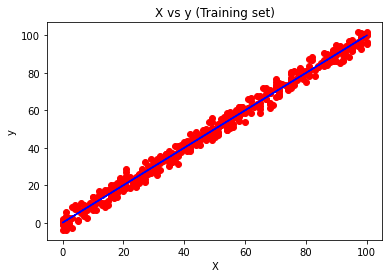

In [176]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('X vs y (Training set)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

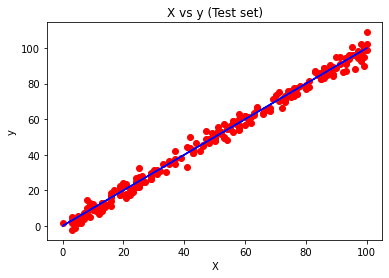

In [178]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('X vs y (Test set)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [180]:
import sklearn.metrics as m

In [181]:
r2_score=m.r2_score(y_test,y_pred)

In [182]:
r2_score

0.9910407496377294

Conclusion : the accuracy level of the model is 0.99